<a href="https://colab.research.google.com/github/AnkitDimri/DS-project-glassdoor_jobs/blob/main/model_building_GD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv ("glassdoor_cleaned_data (1).csv")

In [5]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Min salary', 'Max salary', 'Employer Provided Salary', 'Per Hour',
       'Avg sal', 'loc_hq', 'state', 'age', 'Python', 'r', 'aws', 'spark',
       'exel', 'excel', 'job_simp', 'seniority', 'num_comp'],
      dtype='object')

In [7]:
df_model = df [["Avg sal", "Rating", "Size", "Type of ownership", "Industry", "Sector", "Revenue", "num_comp", "Per Hour", "Employer Provided Salary", 
                "state", "loc_hq", "Python", "aws", "spark", "excel", "job_simp", "seniority", ]]

In [8]:
df_model

,Avg sal,Rating,Size,Type of ownership,Industry,Sector,Revenue,num_comp,Per Hour,Employer Provided Salary,state,loc_hq,Python,aws,spark,excel,job_simp,seniority
0,72.0,3.8,501 to 1000 employees,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),0,0,0,NM,0,1,0,0,1,data scientist,na
1,87.5,3.4,10000+ employees,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),0,0,0,MD,0,1,0,0,0,data scientist,na
2,85.0,4.8,501 to 1000 employees,Company - Private,Security Services,Business Services,$100 to $500 million (USD),0,0,0,FL,1,1,0,1,1,data scientist,na
3,76.5,3.8,1001 to 5000 employees,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),3,0,0,WA,1,1,0,0,0,data scientist,na
4,114.5,2.9,51 to 200 employees,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,3,0,0,NY,1,1,0,0,1,data scientist,na
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737,84.5,3.9,10000+ employees,Company - Public,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,$10+ billion (USD),3,0,0,MA,0,0,1,0,0,na,senior
738,102.5,4.4,1001 to 5000 employees,Company - Public,Internet,Information Technology,$100 to $500 million (USD),3,0,0,TN,0,1,1,1,0,data engineer,senior
739,73.5,2.6,501 to 1000 employees,College / University,Colleges & Universities,Education,Unknown / Non-Applicable,0,0,0,PA,1,0,0,0,1,na,na
740,127.5,3.2,1 to 50 employees,Company - Private,Staffing & Outsourcing,Business Services,$5 to $10 million (USD),0,0,0,PA,0,0,0,0,1,manager,na


In [9]:
df_dum = pd.get_dummies (df_model)

In [10]:
df_dum

,Avg sal,Rating,num_comp,Per Hour,Employer Provided Salary,loc_hq,Python,aws,spark,excel,Size_-1,Size_1 to 50 employees,Size_10000+ employees,Size_1001 to 5000 employees,Size_201 to 500 employees,Size_5001 to 10000 employees,Size_501 to 1000 employees,Size_51 to 200 employees,Size_Unknown,Type of ownership_-1,Type of ownership_College / University,Type of ownership_Company - Private,Type of ownership_Company - Public,Type of ownership_Government,Type of ownership_Hospital,Type of ownership_Nonprofit Organization,Type of ownership_Other Organization,Type of ownership_School / School District,Type of ownership_Subsidiary or Business Segment,Type of ownership_Unknown,Industry_-1,Industry_Accounting,Industry_Advertising & Marketing,Industry_Aerospace & Defense,Industry_Architectural & Engineering Services,Industry_Auctions & Galleries,Industry_Banks & Credit Unions,Industry_Beauty & Personal Accessories Stores,Industry_Biotech & Pharmaceuticals,Industry_Brokerage Services,...,state_FL,state_GA,state_IA,state_ID,state_IL,state_IN,state_KS,state_KY,state_LA,state_MA,state_MD,state_MI,state_MN,state_MO,state_NC,state_NE,state_NJ,state_NM,state_NY,state_OH,state_OR,state_PA,state_RI,state_SC,state_TN,state_TX,state_UT,state_VA,state_WA,state_WI,job_simp_analyst,job_simp_data engineer,job_simp_data scientist,job_simp_director,job_simp_manager,job_simp_mle,job_simp_na,seniority_jr,seniority_na,seniority_senior
0,72.0,3.8,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
1,87.5,3.4,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
2,85.0,4.8,0,0,0,1,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
3,76.5,3.8,3,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0
4,114.5,2.9,3,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737,84.5,3.9,3,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
738,102.5,4.4,3,0,0,0,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
739,73.5,2.6,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
740,127.5,3.2,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [11]:
from sklearn.model_selection import train_test_split

In [13]:
x = df_dum.drop ("Avg sal", axis = 1)
y = df_dum ["Avg sal"].values
X_train, X_test, Y_train, Y_test = train_test_split (x, y, test_size = 0.2, random_state = 42)

In [15]:
import statsmodels.api as sm

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [17]:
X_sm = X = sm.add_constant (x)
model = sm.OLS (y, X_sm)
model.fit().summary()    

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     10.36
Date:                Thu, 17 Dec 2020   Prob (F-statistic):           2.68e-95
Time:                        15:15:49   Log-Likelihood:                -3312.5
No. Observations:                 742   AIC:                             6907.
Df Residuals:                     601   BIC:                             7557.
Df Model:                         140                                         
Covariance Type:            nonrobust                                         
=====================================================================================================================
                                                        coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
const                                                44.0248      6.567      6.704      0.000      31.128      56.922
Rating                                                3.7712      1.931      1.953      0.051      -0.022       7.564
num_comp                                              2.3467      0.863      2.720      0.007       0.652       4.041
Per Hour                                            -37.2629      9.124     -4.084      0.000     -55.181     -19.345
Employer Provided Salary                             31.5495     11.491      2.746      0.006       8.983      54.117
loc_hq                                                2.2411      2.602      0.861      0.389      -2.869       7.351
Python                                                8.0449      2.521      3.191      0.001       3.094      12.996
aws                                                   1.2319      2.705      0.455      0.649      -4.080       6.544
spark                                                -0.5478      2.913     -0.188      0.851      -6.269       5.173
excel                                                -0.2427      2.252     -0.108      0.914      -4.666       4.181
Size_-1                                              13.3036      8.621      1.543      0.123      -3.627      30.234
Size_1 to 50 employees                                1.1168      6.496      0.172      0.864     -11.642      13.875
Size_10000+ employees                                -2.6244      5.785     -0.454      0.650     -13.985       8.736
Size_1001 to 5000 employees                           6.3868      3.834      1.666      0.096      -1.142      13.916
Size_201 to 500 employees                             1.9924      3.860      0.516      0.606      -5.588       9.573
Size_5001 to 10000 employees                         -2.6804      5.325     -0.503      0.615     -13.138       7.777
Size_501 to 1000 employees                            1.9751      4.037      0.489      0.625      -5.953       9.903
Size_51 to 200 employees                              4.0576      4.407      0.921      0.358      -4.597      12.712
Size_Unknown                                         20.4972     13.981      1.466      0.143      -6.960      47.954
Type of ownership_-1                                 13.3036      8.621      1.543      0.123      -3.627      30.234
Type of ownership_College / University                7.7381     17.685      0.438      0.662     -26.995      42.471
Type of ownership_Company - Private                   8.5188      5.231      1.628      0.104      -1.755      18.793
Type of ownership_Company - Public                   13.4294      5.681      2.364      0.018       2.272      24.586
Type of ownersh

In [24]:
from sklearn.linear_model import LinearRegression, Lasso

In [19]:
lm = LinearRegression ()
lm.fit (X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [22]:
from sklearn.model_selection import cross_val_score
np.mean (cross_val_score (lm, X_train, Y_train, scoring = 'neg_mean_absolute_error', cv = 3))

-491395723651.3803

In [26]:
lm_l = Lasso ()
np.mean (cross_val_score (lm_l, X_train, Y_train, scoring = 'neg_mean_absolute_error', cv = 3))

-21.078371586123275

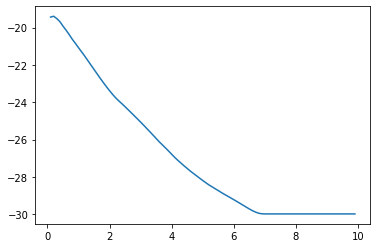

In [30]:
alpha = []
error = []

for i in range (1, 100):
    alpha.append(i/10)
    lml = Lasso (alpha = (i/10))
    error.append (np.mean (cross_val_score (lml, X_train, Y_train, scoring = 'neg_mean_absolute_error', cv = 3)))
    
plt.plot (alpha, error)

In [31]:
err = tuple (zip (alpha, error))

In [32]:
df_err = pd.DataFrame (err, columns = ['alpha', 'error'])
df_err [df_err.error == max (df_err.error)]

,alpha,error
1,0.2,-19.396676


In [33]:
from sklearn.ensemble import RandomForestRegressor

In [35]:
rf = RandomForestRegressor ()
np.mean (cross_val_score (rf, X_train, Y_train, scoring = 'neg_mean_absolute_error', cv = 3))

-14.928402246866233

In [36]:
from sklearn.model_selection import GridSearchCV

In [41]:


parameters = {'n_estimators': range(10, 100, 10), 'criterion': ('mse', 'mae'), 'max_features': ('auto', 'sqrt', 'log2')}

In [42]:
gs = GridSearchCV (rf, parameters, scoring = 'neg_mean_absolute_error', cv = 3)

In [43]:
gs.fit (X_train, Y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [44]:
gs.best_score_

-14.836080811823019

In [45]:
gs.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=80, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [49]:
tpred_lm = lm.predict (X_test)
#tpred_lml = lml.predict (X_test)
tpred_rf = gs.best_estimator_.predict (X_test)